In [3]:
import pandas as pd
import numpy as np
# This is important if oyou uploade the ipynb file in google colab please remove the # symbol from the next line otherwise it will not work. Moreover if you are using VS code please remove the # symbol from the next line otherwise it will not work
#from google.colab import files
#import io

uploaded = files.upload()


Saving customer_data.csv to customer_data.csv
Saving product_data.csv to product_data.csv
Saving retail_sales_data.csv to retail_sales_data.csv


In [4]:
sales_data = pd.read_csv('retail_sales_data.csv')

In [8]:
display(sales_data)

,sale_id,sale_date,store_location,product_category,sales,customer_id,discount_applied,payment_method
0,1,2023-04-13,Chicago,Clothing,1704.0,221,15,PayPal
1,2,2023-12-15,Chicago,Home Goods,1254.0,231,5,Credit Card
2,3,2023-09-28,New York,Clothing,1722.0,53,0,Cash
3,4,2023-04-17,Los Angeles,Clothing,1079.5,295,20,PayPal
4,5,2023-03-13,Los Angeles,Home Goods,1079.5,321,15,Cash
...,...,...,...,...,...,...,...,...
995,996,2023-02-07,Chicago,Electronics,1073.0,435,0,Cash
996,997,2023-10-20,New York,Electronics,731.0,48,0,Credit Card
997,998,2023-05-19,Los Angeles,Clothing,1690.0,405,10,Cash
998,999,2023-12-22,New York,Electronics,1079.5,379,20,PayPal


In [6]:
sales_data['sales'] = pd.to_numeric(sales_data['sales'], errors='coerce')
sales_data['sales'].fillna(sales_data['sales'].median(), inplace=True)


In [7]:
display(sales_data)

,sale_id,sale_date,store_location,product_category,sales,customer_id,discount_applied,payment_method
0,1,2023-04-13,Chicago,Clothing,1704.0,221,15,PayPal
1,2,2023-12-15,Chicago,Home Goods,1254.0,231,5,Credit Card
2,3,2023-09-28,New York,Clothing,1722.0,53,0,Cash
3,4,2023-04-17,Los Angeles,Clothing,1079.5,295,20,PayPal
4,5,2023-03-13,Los Angeles,Home Goods,1079.5,321,15,Cash
...,...,...,...,...,...,...,...,...
995,996,2023-02-07,Chicago,Electronics,1073.0,435,0,Cash
996,997,2023-10-20,New York,Electronics,731.0,48,0,Credit Card
997,998,2023-05-19,Los Angeles,Clothing,1690.0,405,10,Cash
998,999,2023-12-22,New York,Electronics,1079.5,379,20,PayPal


In [10]:
sales_data['sale_data']=pd.to_datetime(sales_data['sale_date'])

In [11]:
display(sales_data)

,sale_id,sale_date,store_location,product_category,sales,customer_id,discount_applied,payment_method,sale_data
0,1,2023-04-13,Chicago,Clothing,1704.0,221,15,PayPal,2023-04-13
1,2,2023-12-15,Chicago,Home Goods,1254.0,231,5,Credit Card,2023-12-15
2,3,2023-09-28,New York,Clothing,1722.0,53,0,Cash,2023-09-28
3,4,2023-04-17,Los Angeles,Clothing,1079.5,295,20,PayPal,2023-04-17
4,5,2023-03-13,Los Angeles,Home Goods,1079.5,321,15,Cash,2023-03-13
...,...,...,...,...,...,...,...,...,...
995,996,2023-02-07,Chicago,Electronics,1073.0,435,0,Cash,2023-02-07
996,997,2023-10-20,New York,Electronics,731.0,48,0,Credit Card,2023-10-20
997,998,2023-05-19,Los Angeles,Clothing,1690.0,405,10,Cash,2023-05-19
998,999,2023-12-22,New York,Electronics,1079.5,379,20,PayPal,2023-12-22


In [13]:
sales_summary = sales_data['sales'].describe()

In [18]:
# prompt: display(sales_summary)
# ser = pd.Series(sales_summary)
# for pos in range(len(ser)):
#   display(ser.iloc[pos]) but the first column title need to be present

display(sales_summary)
ser = pd.Series(sales_summary)
ser.index.name = 'Metric' # Set the name for the index
for pos in range(len(ser)):
  display(ser.iloc[[pos]]) # Use double brackets to keep the index


,sales
count,1000.000000
mean,1075.319000
std,513.157301
min,100.000000
25%,661.500000
50%,1079.500000
75%,1499.000000
max,1999.000000


,sales
Metric,
count,1000.0


,sales
Metric,
mean,1075.319


,sales
Metric,
std,513.157301


,sales
Metric,
min,100.0


,sales
Metric,
25%,661.5


,sales
Metric,
50%,1079.5


,sales
Metric,
75%,1499.0


,sales
Metric,
max,1999.0


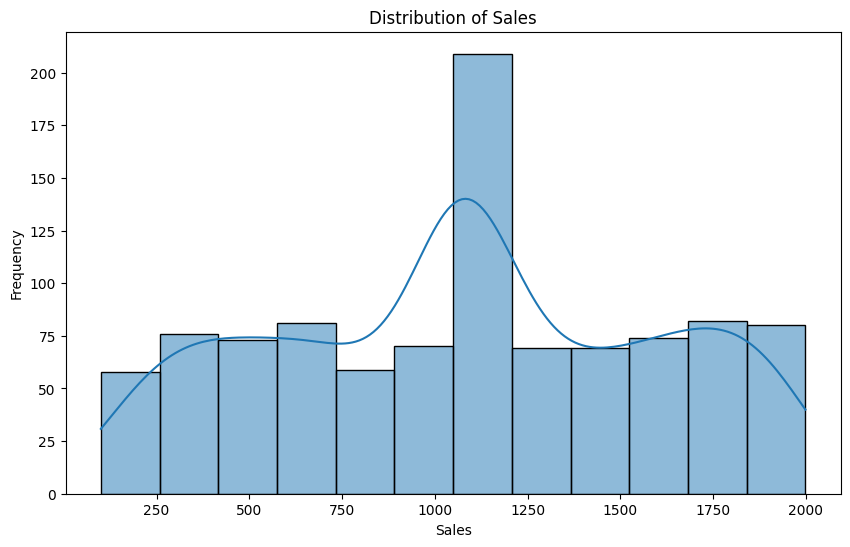

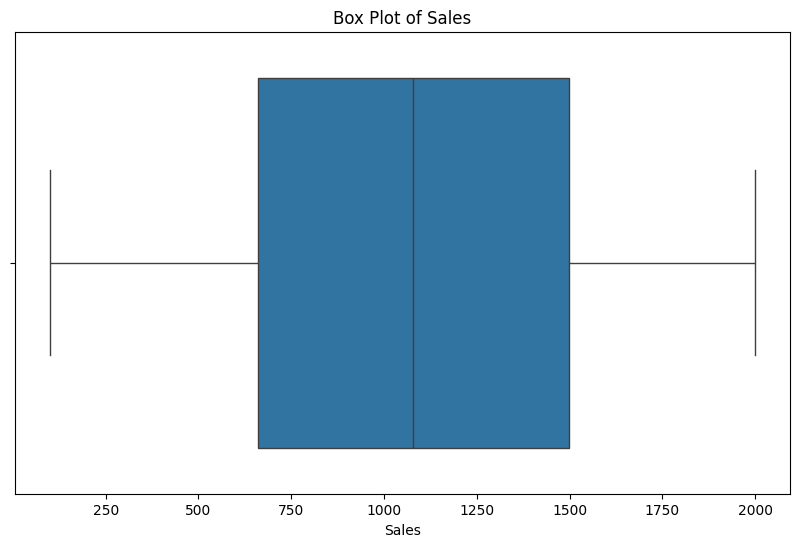

In [19]:
# prompt: Explore the distribution of the sales values using descriptive stats and visualisations to understand the distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of sales
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Box plot of sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_data['sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()


In [25]:
store_summary = sales_data['store_location'].describe()
product_summary = sales_data['product_category'].describe()
display(store_summary)
display(product_summary)



,store_location
count,1000
unique,3
top,New York
freq,339


,product_category
count,1000
unique,3
top,Clothing
freq,352


In [27]:
sales_summary = sales_data['sales'].describe()
display(sales_summary)

,sales
count,1000.000000
mean,1075.319000
std,513.157301
min,100.000000
25%,661.500000
50%,1079.500000
75%,1499.000000
max,1999.000000


<Axes: >

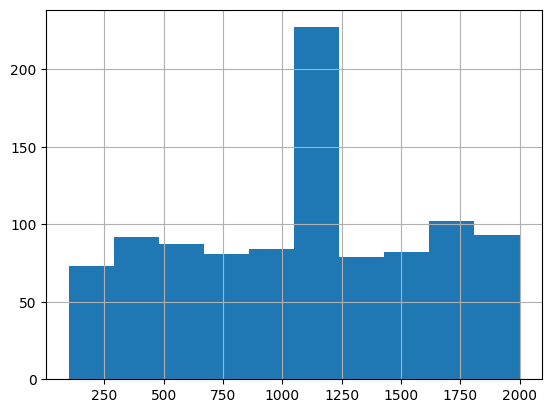

In [28]:
sales_distribution = sales_data['sales'].hist()
display(sales_distribution)

In [33]:
location_summary = sales_data.groupby('store_location')['sales'].describe()
display(location_summary)

,count,mean,std,min,25%,50%,75%,max
store_location,,,,,,,,
Chicago,331.0,1103.064955,508.935082,100.0,697.5,1079.5,1509.5,1996.0
Los Angeles,330.0,1064.080303,502.591552,100.0,675.0,1079.5,1427.0,1998.0
New York,339.0,1059.168142,527.645226,100.0,635.5,1079.5,1519.5,1999.0


In [37]:
category_summary = sales_data.groupby('product_category')['sales'].describe()
display(category_summary)

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Clothing,352.0,1072.771307,516.437480,139.0,657.75,1079.5,1513.0,1992.0
Electronics,343.0,1090.908163,519.922390,100.0,676.50,1079.5,1513.0,1999.0
Home Goods,305.0,1060.727869,502.797826,100.0,656.00,1079.5,1447.0,1998.0
